In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pretty_midi as pm

### Define Functions to use
No need to read this part...

In [3]:
def freqMap(data,freq,log=True,inv=False,offset=0):
    if log:
        bins = np.linspace(np.log(data.min()), np.log(data.max()), len(freq)-1)
        digitized = np.digitize(np.log(data),bins)
    else:
        bins = np.linspace(data.min(), data.max(), len(freq)-1)
        np.digitize(data,bins)
    
    f = [freq[i] for i in digitized]
                            #     if inv:
                            #         f = [freq[i] for i in digitized]
                            #     else:
                            #         f = [freq[i] for i in digitized]
    return f

def make_track(note_list):
    track = [ [note_list[0],1] ]
    for note in note_list[1:]:
        if note == track[-1][0]:
            track[-1][1] += 1
        else:
            track.append([note,1])
    return track

### Import Saved Streamflow data
these are **daily average streamflow data** for each gage in the Des Moines River Basin from **October 2010 to September of 2020**

In [5]:
with open('misc/dmrb.pickle', 'rb') as handle:
    dmrb = pickle.load(handle)


In [29]:
df = pd.DataFrame()
for gauge in dmrb:
    df[gauge] = pd.Series(dmrb[gauge])
colsDrop = ['05476500','05476590','05476735','05478265','05480080','05480820','05480930','05489490','05481510','05482315','05482430','05483318','05483349','05483470','05484600']
df.drop(columns = colsDrop ,inplace=True)
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df = df.astype(float)


# Water Quality Data

In [17]:
# daily_N = pd.read_csv('misc/raccoon daily running nitrate 1974-2016.csv',dtype={'data':str,'N':float},index_col=0)
# daily_N.index = pd.to_datetime(daily_N.index)

### Tonal Mapping - Vars

In [18]:
freqDict = {
#     'C Major Pentatonic' : [130.81,146.83,164.81,196,220,261.63,293.66,329.63,392,440,523.25,587.3,659.26,783.99,880,1046],
#     'Chromatic' : [130.81,138.59,146.83,155.56,164.81,174.61,185.00,196.00,207.65,220.00,233.08,246.94,261.63,277.18,293.66,311.13,329.63,349.23,369.99,392.00,415.30,440.00,466.16,493.88,523.25,554.37],
    'Arab Double Harmonic' : [130.81,138.59,164.81,174.61,196.00,207.65,246.94,261.63,277.18,329.63,349.23,392.00,415.30,493.88,523.25],
    'Chromatic' : [i for i in range(36,84)],
    'C Major Pentatonic' : [48,50,52,55,57,60,62,64,67,69,72,74,76,79,81,84],
    'C Major Diatonic' : [36,38,40,41,43,45,47,48,50,52,53,55,57,59,60,62,64,65,67,69,71,72,74,76,77,79,81,84], # C2:C6
    'A Minor Pentatonic' : [45,48,50,52,55,57,60,62,64,67,69,72,74,76,79,81,84],
    'G Major Pentatonic' : [43,45,48,50,52,55,57,60,62,64,67,69,72,74,76,79,81,84]
}

rootgages = {'raccoon':'05484900','upper':'05482000','lower':'05490500'}
uppergages = {
    'raccoon' :['05482300','05483450'],
    'upper' : ['05476750','05479000'],
    'lower' : ['05487470','05488200']
}

# Gaged areas
upper = 6245; raccoon = 3625; total = 14038; lower = total - raccoon - upper;

### Step: Choose the root, or dominant, gage
For the example of the Des Moines River Basin, there are three dominant gages which partion the basin into:
- `upper`
- `lower`
- `raccoon`

With the same key we can grab a curated selection of gages that are nested *within* the root basin.
(These have been curated over the length of the weekend through trial and error.
Go ahead, play a little. Pick any one of the gage names in `df`)

In [24]:
# subbasin = 'lower'
# root = rootgages[subbasin]
# sup = uppergages[subbasin]

root =  '05490500' 
sup = ['05486490', '05481950']

### Step: Pick Start and Stop Dates, Total Play Time for Audio
The dataset has daily data from `2010-10-11` to `2020-09-30`.
You can choose any slice of time to sonify between those two dates.

<!Next, the audio play length **in seconds**.!>
<!We recommend ~60 per year of streamflow data.!>
<!totalPlayTime = 600 # sec !>

In [20]:
start = '2011-10-11'
stop = '2019-09-30'

In [22]:
# N_data = daily_N[start:stop]
# N_data['rounded'] = N_data.N.round()

### Step 4: Map Flows to Frequencies for Each Voice

<!FrequencyFor the flow to frequency mapping can be done in a number of ways.We have chosen to bin frequencies and then map those binned flow data to a specific frequency in the frequency array we defined above.The default is to map high flows to high frequencies (high flows equal higher tones/pitches.)Note that for `fd` we supply a argument `inv=True`.That means we invert the relationship for that gage (high flows mean lower tones/pitches.)We have found that this creates interesting musicality when the largest basin is inverted.!>

<!Amplitude: Altering the amplitude would change the dynamics; whether something is louder or quieter.In this example we do not change the amplitude with respect to flow, but(!) it can be done, and we have done so in some of our "songs".List to some of our `.wav` files to take a listen to dynamically changing amplitudes with flow as well.!>

In [30]:
voice1_fm = freqMap(
    df[root][start:stop],
    freqDict['A Minor Pentatonic']
)

voice2_fm = freqMap(
    df[sup[0]][start:stop].astype(np.float64),
    freqDict['C Major Pentatonic'][::-1]
)

voice3_fm = freqMap(
    df[sup[1]][start:stop].astype(np.float64),
    freqDict['C Major Pentatonic']
)

# N_note_ind = make_track(list(N_data.rounded))
# for ind in N_note_ind:
#     ind[0] = freqDict['C Major Diatonic'][int(ind[0])]

### Visualize the note frequency changes

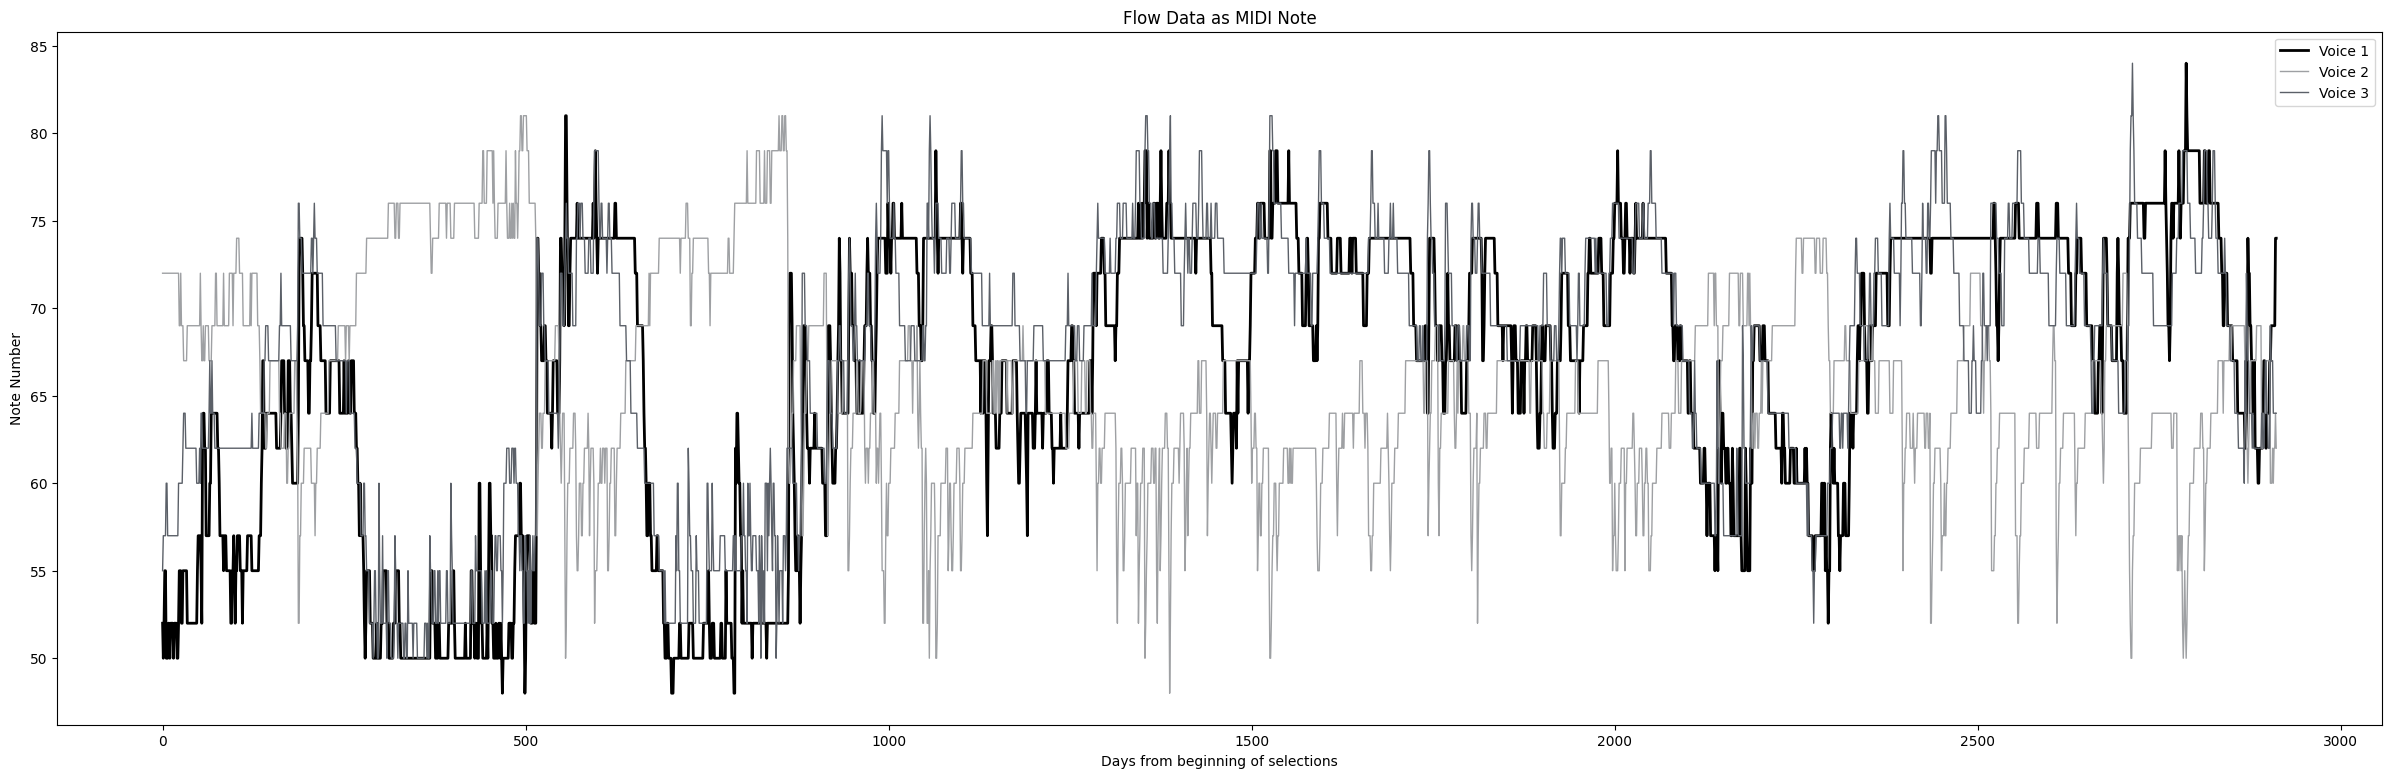

In [31]:
plt.figure(figsize=(30,9))
plt.plot(voice1_fm,color='k',linewidth=2,label='Voice 1')
plt.plot(voice2_fm,color='#9ea0a3',linewidth=1,label='Voice 2')
plt.plot(voice3_fm,color='#5b6068',linewidth=1,label='Voice 3')
plt.legend()
plt.title('Flow Data as MIDI Note')
plt.ylabel('Note Number')
plt.xlabel('Days from beginning of selections')
plt.show()

# Write to MIDI File and Play Outside of Python

In [36]:
raccoon = pm.PrettyMIDI()
instrument1 = pm.Instrument(program=99)
instrument2 = pm.Instrument(program=99)
instrument3 = pm.Instrument(program=99)
beat_length = 0.2

In [37]:
# ## WITH 3 Stream Data
for track,instrument in zip([make_track(voice1_fm), make_track(voice2_fm), make_track(voice3_fm)],[instrument1,instrument2,instrument3]):
    start = 0
    for t in track:
        end = start + beat_length * t[1]
        note = pm.Note(
            velocity=100,
            pitch=t[0],
            start=start,
            end= end
        )
        instrument.notes.append(note)
        start = end


In [38]:
raccoon.instruments.append(instrument1)
raccoon.instruments.append(instrument2)
raccoon.instruments.append(instrument3)
raccoon.write('music/mid/output_99.mid')

In [39]:
import requests

## Get Gauge Locations from USGS API

Fetch latitude and longitude for all gauges in the dataframe.

In [40]:
def get_usgs_site_info(site_numbers):
    """
    Fetch site information including lat/lon from USGS Water Services API
    
    Parameters:
    site_numbers: list of USGS site numbers (e.g., ['05476750', '05479000'])
    
    Returns:
    dict: {site_number: (lat, lon, name)}
    """
    # Join site numbers with commas
    sites_str = ','.join(site_numbers)
    
    # USGS Site Service endpoint
    url = f"https://waterservices.usgs.gov/nwis/site/?format=rdb&sites={sites_str}&siteOutput=expanded"
    
    print(f"Fetching data for {len(site_numbers)} sites...")
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Error: {response.status_code}")
        return {}
    
    # Parse the RDB format (tab-delimited with # comments)
    lines = response.text.split('\n')
    
    # Skip comment lines and find header
    data_lines = [line for line in lines if not line.startswith('#')]
    
    if len(data_lines) < 2:
        return {}
    
    # First line is headers, second is data types (skip), rest is data
    headers = data_lines[0].split('\t')
    
    # Find column indices
    site_no_idx = headers.index('site_no')
    lat_idx = headers.index('dec_lat_va')
    lon_idx = headers.index('dec_long_va')
    name_idx = headers.index('station_nm')
    
    # Parse data lines (skip first two: headers and format)
    site_info = {}
    for line in data_lines[2:]:
        if line.strip():
            parts = line.split('\t')
            if len(parts) > max(site_no_idx, lat_idx, lon_idx, name_idx):
                site_no = parts[site_no_idx]
                lat = float(parts[lat_idx]) if parts[lat_idx] else None
                lon = float(parts[lon_idx]) if parts[lon_idx] else None
                name = parts[name_idx]
                
                if lat and lon:
                    site_info[site_no] = (lat, lon, name)
    
    print(f"Retrieved {len(site_info)} site locations")
    return site_info


In [41]:

# Fetch locations for all gauges in df
gauge_list = df.columns.tolist()
gauge_locations = get_usgs_site_info(gauge_list)

Fetching data for 32 sites...
Retrieved 32 site locations
Retrieved 32 site locations


In [42]:
gauge_locations

{'05476750': (42.71944444, -94.2202778, 'Des Moines River at Humboldt, IA'),
 '05479000': (42.7236111,
  -94.19325,
  'East Fork Des Moines River at Dakota City, IA'),
 '05480500': (42.5083333, -94.2033333, 'Des Moines River at Fort Dodge, IA'),
 '05481000': (42.4319722, -93.8059444, 'Boone River near Webster City, IA'),
 '05481300': (42.25225, -93.9974667, 'Des Moines River near Stratford, IA'),
 '05481650': (41.6803333,
  -93.6676111,
  'Des Moines River near Saylorville, IA'),
 '05481950': (41.6883333, -93.7347222, 'Beaver Creek near Grimes, IA'),
 '05482000': (41.61194444,
  -93.6197222,
  'Des Moines River at 2nd Avenue at Des Moines, IA'),
 '05482300': (42.35455556,
  -94.9910278,
  'North Raccoon River near Sac City, IA'),
 '05482500': (41.9878611,
  -94.3770833,
  'North Raccoon River near Jefferson, IA'),
 '05483450': (41.7790833, -94.493, 'Middle Raccoon River near Bayard, IA'),
 '05483600': (41.68741667, -94.3710556, 'Middle Raccoon River at Panora, IA'),
 '05484000': (41.59

In [ ]:
# Display the results
for site, (lat, lon, name) in gauge_locations.items():
    print(f"{site}: ({lat}, {lon}) - {name}")

--------------------

<br><br><br><br>

# OLD STUFF BELOW (don't look)

In [40]:
# import simpleaudio as sa
# from scipy import signal
# import wavio

In [41]:
# def wave(t,f,a,wtype):
#     func = {'sin':np.sin, 'saw':signal.sawtooth, 'square':signal.square}
#     if wtype == 'sin':
#         return a * func[wtype](f * t * 2 * np.pi) * a/2 * func[wtype](2 * f * t * np.pi)
#     else:
#         return a * func[wtype](2 * np.pi * f * t)

# def waveform(t,d,extras=[]):
#     # Form
#     # [method,a,f]
    
#     func = {'sin':np.sin, 'saw':signal.sawtooth, 'square':signal.square}
    
#     # create base wave form with dominant freq and harmonic(s)
#     wave = d[1] * func[d[0]](d[2] * t * 2 * np.pi) + d[1]/2 * func[d[0]](2 * d[2] * t * 2 * np.pi) 
    
#     # and movement given other gages (upstream)
#     # [method,a,f]
#     for w in extras:
#         wave += w[1] * func[w[0]](2 * np.pi * w[2] * t)
    
#     return wave

# def linkTones(tones):
#     for t in tones:
#         l = int(len(t)/4)
#         for i in range(0,l):
#             t[len(t) - l+i] *= (1 - i /l)
#             t[i] *= i/l
            
#     full = np.concatenate(tones)
#     full = full * (2**15 - 1) / np.max(np.abs(full))
#     return full.astype(np.int16)

# def linearFlow2Freq(flow,flowLimits,freqLimits,relationship='negative'):
#     lowFreq = 130
#     highFreq = 1300
    
#     lowFlow = 0
#     highFlow = 90000
    
#     if relationship == 'negative':
#         freq = (freqLimits[0] - freqLimits[1])/(flowLimits[1] - flowLimits[0]) * flow + freqLimits[1]
#     else:
#         freq = (freqLimits[1] - freqLimits[0])/(flowLimits[1] - flowLimits[0]) * flow + freqLimits[0]
        
#     return freq

### Step 1: Choose your array of frequencies
Your choices:
- `C Major Pentatonic`
- `Chromatic`
- `Arab Double Harmonic`

`freq` holds the scale from low to high notes

`invfreq` hold the scale from high to low notes

In [22]:
# style = 'A Minor Pentatonic'
# freq = freqDict[style]
# freqinv = freq[::-1] # switch order to play 

In [53]:
# Wait for playback to finish before exiting
# play_obj = sa.play_buffer(full, 1, 2, fs)
# play_obj.wait_done()

In [7]:
# Lower
# supA_1 = 460 
# supA_2 = 90.1

# Upper
# supA_1 = 2256
# supA_2 = 1308

# # Raccoon
# supA_1 = 700
# supA_2 = 375

## If you like it, save it as a wav file

In [57]:
# fileName = "music/wav/{0}-{1}-{2}-{3}.wav".format(subbasin,style,start,stop)
# wavio.write(fileName, full, fs, sampwidth=2)

In [50]:
# dayPlay = totalPlayTime / len(df[root][start:stop]) # length of note/day in seconds
# fs = 44100 # samples per second
# t = np.linspace(0, dayPlay, dayPlay * fs, False)
# totalSamples = totalPlayTime * fs

In [51]:
# tones = []
# for a,f,a1,f1,a2,f2 in zip(ad,fd,as1,fs1,as2,fs2):

#     #dominant tone
#     dom = ['sin',a,f]
           
#     # give extras
#     extra = []
# #     extra.append(['sin',a2,f2]) ## 
#     extra.append(['square',a1,f1])
#     extra.append(['square',a2,f2])
    
#     tone = waveform(t,dom,extra)
#     tones.append(tone)
    
# intro = t*tones[0]    
# tones.insert(0,intro)

# outtro= tone*np.exp(-50*t)
# tones.append(outtro)

# full = linkTones(tones)

In [141]:
# start = 0
# beat_length = 0.15
# for t in track:
#     end = start + beat_length * t[1]
#     note = pm.Note(
#         velocity=100,
#         pitch=t[0],
#         start=start,
#         end= end
#     )
#     instrument1.notes.append(note)
#     start = end


# track2 = [[fs1[0],1]]
# for note in fs1[1:]:
#     if note == track[-1][0]:
#         track2[-1][1] += 1
#     else:
#         track2.append([note,1])

# for note,ind in zip(fd,range(len(fd))):
#     note = pm.Note(
#         velocity=100,
#         pitch=note,
#         start=ind*0.25,
#         end=(ind+1)*0.25
#     )
#     instrument1.notes.append(note)

# for note,ind in zip(fs1,range(len(fs1))):
#     note = pm.Note(
#         velocity=100,
#         pitch=note,
#         start=ind*0.25,
#         end=(ind+1)*0.25
#     )
#     instrument2.notes.append(note)

# for note,ind in zip(fs2,range(len(fs2))):
#     note = pm.Note(
#         velocity=100,
#         pitch=note,
#         start=ind*0.25,
#         end=(ind+1)*0.25
#     )
#     instrument3.notes.append(note)

# raccoon.instruments.append(instrument1)
# raccoon.instruments.append(instrument2)
# raccoon.instruments.append(instrument3)
# raccoon.write('instrument1.mid')